In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans






pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

In [4]:
df = pd.read_csv('Marktkampagne.csv')
df.head()

,ID,Geburtsjahr,Bildungsniveau,Familienstand,Einkommen,Kinder_zu_Hause,Teenager_zu_Hause,Datum_Kunde,Letzter_Kauf_Tage,Ausgaben_Wein,Ausgaben_Obst,Ausgaben_Fleisch,Ausgaben_Fisch,Ausgaben_Süßigkeiten,Ausgaben_Gold,Anzahl_Rabattkäufe,Anzahl_Webkäufe,Anzahl_Katalogkäufe,Anzahl_Ladeneinkäufe,Anzahl_WebBesuche_Monat,Kampagne_3_Akzeptiert,Kampagne_4_Akzeptiert,Kampagne_5_Akzeptiert,Kampagne_1_Akzeptiert,Kampagne_2_Akzeptiert,Beschwerde,Z_Kontaktkostenfaktor,Z_Umsatzfaktor,Antwort_Letzte_Kampagne
0,5524,1967,Hochschulabschluss,Ledig,58138.0,0,0,04-09-2022,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1964,Hochschulabschluss,Ledig,46344.0,1,1,08-03-2024,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1975,Hochschulabschluss,Zusammenlebend,71613.0,0,0,21-08-2023,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1994,Hochschulabschluss,Zusammenlebend,26646.0,1,0,10-02-2024,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1991,Doktor,Verheiratet,58293.0,1,0,19-01-2024,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2240 non-null   int64  
 1   Geburtsjahr              2240 non-null   int64  
 2   Bildungsniveau           2240 non-null   object 
 3   Familienstand            2240 non-null   object 
 4   Einkommen                2216 non-null   float64
 5   Kinder_zu_Hause          2240 non-null   int64  
 6   Teenager_zu_Hause        2240 non-null   int64  
 7   Datum_Kunde              2240 non-null   object 
 8   Letzter_Kauf_Tage        2240 non-null   int64  
 9   Ausgaben_Wein            2240 non-null   int64  
 10  Ausgaben_Obst            2240 non-null   int64  
 11  Ausgaben_Fleisch         2240 non-null   int64  
 12  Ausgaben_Fisch           2240 non-null   int64  
 13  Ausgaben_Süßigkeiten     2240 non-null   int64  
 14  Ausgaben_Gold           

In [7]:
df.isnull().sum()

ID                          0
Geburtsjahr                 0
Bildungsniveau              0
Familienstand               0
Einkommen                  24
Kinder_zu_Hause             0
Teenager_zu_Hause           0
Datum_Kunde                 0
Letzter_Kauf_Tage           0
Ausgaben_Wein               0
Ausgaben_Obst               0
Ausgaben_Fleisch            0
Ausgaben_Fisch              0
Ausgaben_Süßigkeiten        0
Ausgaben_Gold               0
Anzahl_Rabattkäufe          0
Anzahl_Webkäufe             0
Anzahl_Katalogkäufe         0
Anzahl_Ladeneinkäufe        0
Anzahl_WebBesuche_Monat     0
Kampagne_3_Akzeptiert       0
Kampagne_4_Akzeptiert       0
Kampagne_5_Akzeptiert       0
Kampagne_1_Akzeptiert       0
Kampagne_2_Akzeptiert       0
Beschwerde                  0
Z_Kontaktkostenfaktor       0
Z_Umsatzfaktor              0
Antwort_Letzte_Kampagne     0
dtype: int64

In [8]:
# Fehlende Werte im Einkommen ersetzen
median_einkommen = df['Einkommen'].median()
df['Einkommen'].fillna(median_einkommen, inplace=True)

C:\Users\maxim\AppData\Local\Temp\ipykernel_17504\2241144244.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Einkommen'].fillna(median_einkommen, inplace=True)


In [9]:
# Datum konvertieren + Alter berechnen
df['Datum_Kunde'] = pd.to_datetime(df['Datum_Kunde'], format='%d-%m-%Y')
aktuelles_jahr = datetime.now().year
df['Alter'] = aktuelles_jahr - df['Geburtsjahr']

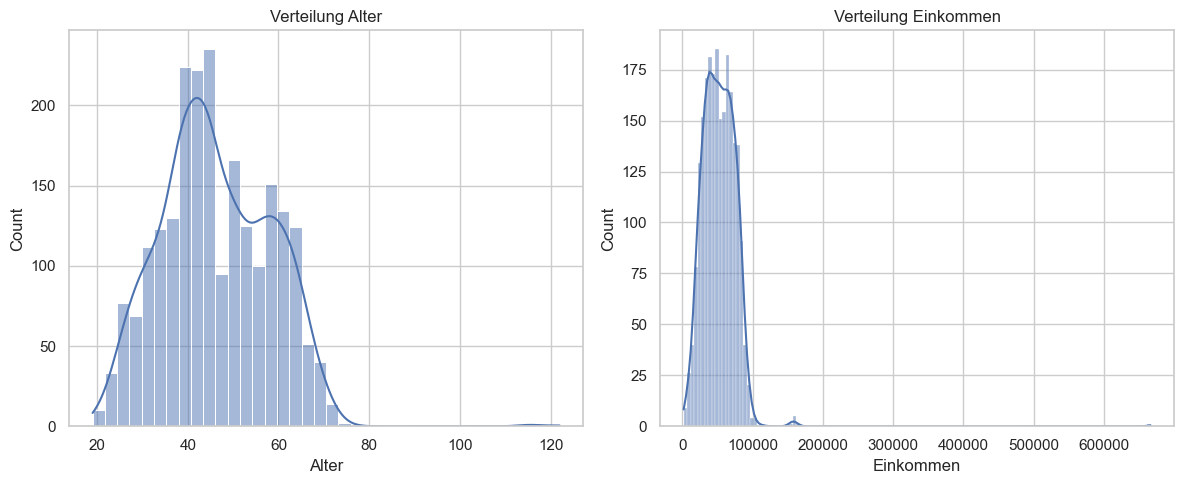

In [10]:
# Verteilung: Alter und Einkommen
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(df['Alter'], kde=True, ax=axes[0])
axes[0].set_title('Verteilung Alter')
sns.histplot(df['Einkommen'], kde=True, ax=axes[1])
axes[1].set_title('Verteilung Einkommen')
plt.tight_layout()
plt.show()

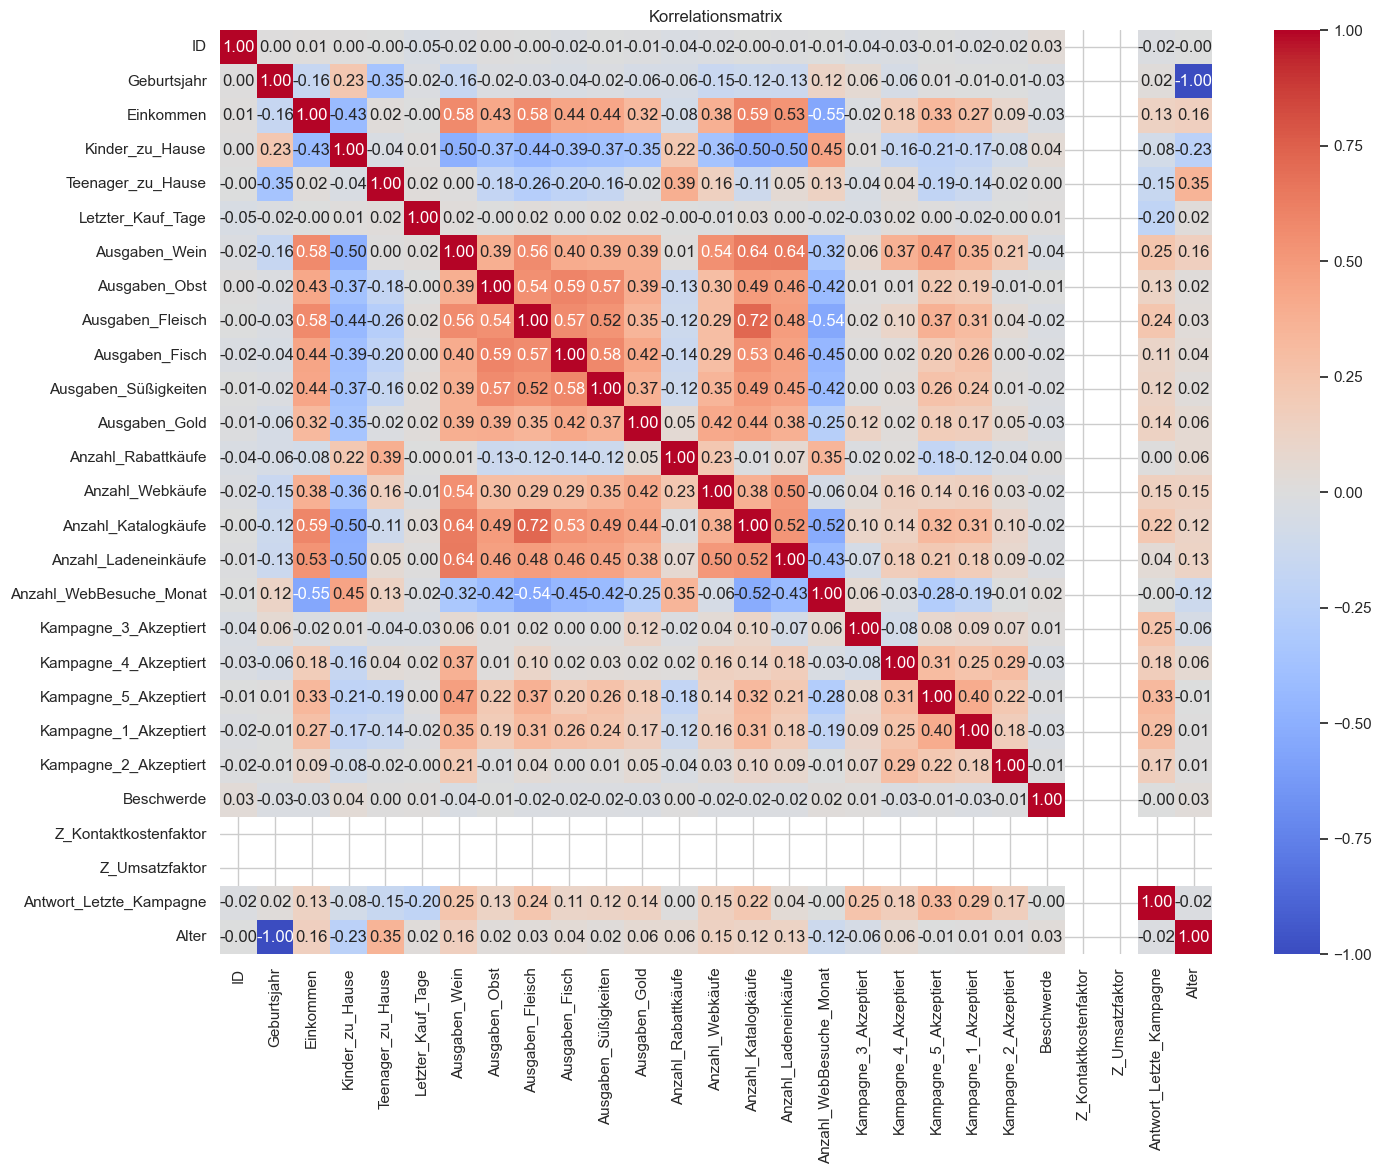

In [11]:
# Korrelationen untersuchen
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Korrelationsmatrix')
plt.show()

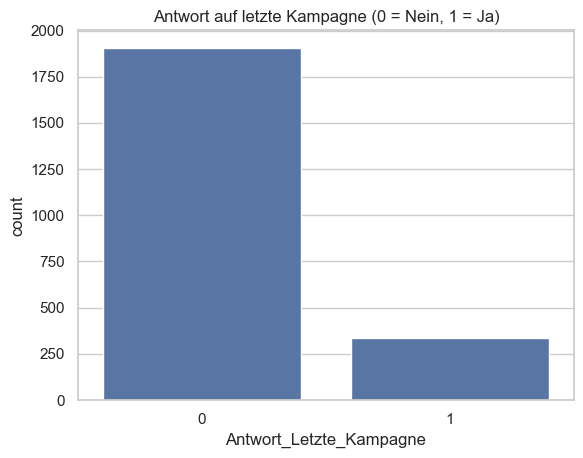

In [12]:
# Wer hat auf letzte Kampagne reagiert?
sns.countplot(x='Antwort_Letzte_Kampagne', data=df)
plt.title('Antwort auf letzte Kampagne (0 = Nein, 1 = Ja)')
plt.show()

In [13]:
df = pd.read_csv('Marktkampagne.csv')
df['Einkommen'].fillna(df['Einkommen'].median(), inplace=True)
df['Alter'] = pd.to_datetime('today').year - df['Geburtsjahr']

C:\Users\maxim\AppData\Local\Temp\ipykernel_17504\1812501387.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Einkommen'].fillna(df['Einkommen'].median(), inplace=True)


In [14]:
# Gesamtausgaben berechnen (Summe der Produktkategorien)
produkt_spalten = ['Ausgaben_Wein', 'Ausgaben_Obst', 'Ausgaben_Fleisch',
                   'Ausgaben_Fisch', 'Ausgaben_Süßigkeiten', 'Ausgaben_Gold']
df['Gesamtausgaben'] = df[produkt_spalten].sum(axis=1)
df[['Gesamtausgaben'] + produkt_spalten].head()

,Gesamtausgaben,Ausgaben_Wein,Ausgaben_Obst,Ausgaben_Fleisch,Ausgaben_Fisch,Ausgaben_Süßigkeiten,Ausgaben_Gold
0,1617,635,88,546,172,88,88
1,27,11,1,6,2,1,6
2,776,426,49,127,111,21,42
3,53,11,4,20,10,3,5
4,422,173,43,118,46,27,15


In [15]:
# Zielvariable & Features definieren
X = df[['Einkommen', 'Alter', 'Anzahl_Webkäufe', 'Anzahl_Katalogkäufe', 'Anzahl_Ladeneinkäufe', 'Anzahl_WebBesuche_Monat']]
y = df['Gesamtausgaben']

In [16]:
# Datensatz aufteilen in Training und Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
# Lineares Regressionsmodell trainieren
modell = LinearRegression()
modell.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
# Vorhersagen generieren
y_pred = modell.predict(X_test)

In [19]:
# Modellgüte prüfen
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'R²-Wert: {r2:.2f}')
print(f'RMSE: {rmse:.2f}')

R²-Wert: 0.74
RMSE: 294.91


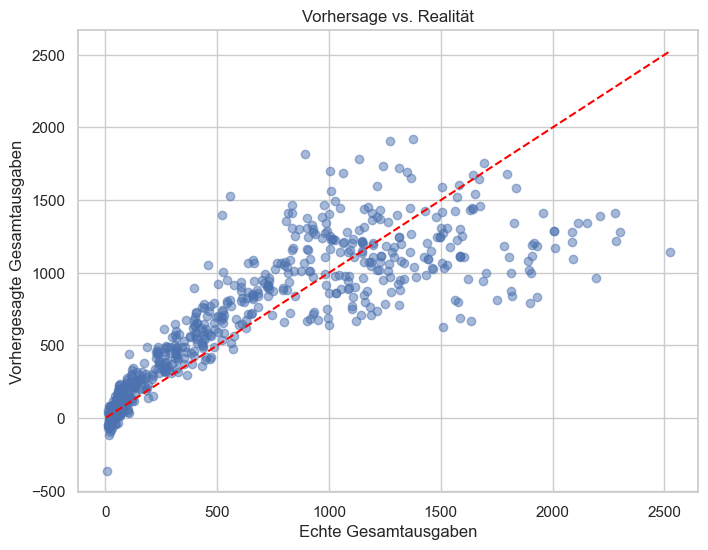

In [20]:
# Vergleich: Vorhergesagte vs. echte Gesamtausgaben
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Echte Gesamtausgaben')
plt.ylabel('Vorhergesagte Gesamtausgaben')
plt.title('Vorhersage vs. Realität')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.show()

In [21]:
df = pd.read_csv('Marktkampagne.csv')
df['Einkommen'].fillna(df['Einkommen'].median(), inplace=True)
df['Alter'] = pd.to_datetime('today').year - df['Geburtsjahr']

C:\Users\maxim\AppData\Local\Temp\ipykernel_17504\1812501387.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Einkommen'].fillna(df['Einkommen'].median(), inplace=True)


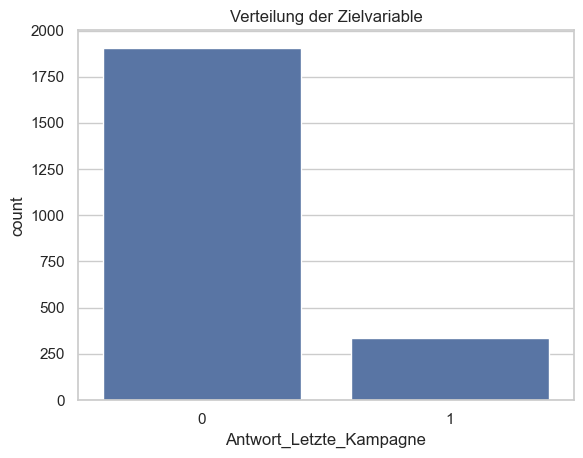

In [22]:
# Zielvariable untersuchen (Antwort auf letzte Kampagne)
sns.countplot(x='Antwort_Letzte_Kampagne', data=df)
plt.title('Verteilung der Zielvariable')
plt.show()

In [23]:
# Features und Ziel definieren
X = df[['Einkommen', 'Alter', 'Anzahl_Webkäufe', 'Anzahl_Katalogkäufe', 'Anzahl_Ladeneinkäufe', 'Anzahl_WebBesuche_Monat']]
y = df['Antwort_Letzte_Kampagne']

In [31]:
# Daten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
# Logistisches Regressionsmodell erstellen
modell = LogisticRegression(max_iter=1000)
modell.fit(X_train, y_train)

c:\Users\maxim\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\multiclass.py:213: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  y_type = type_of_target(y, input_name="y")
c:\Users\maxim\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [25]:
# Vorhersagen machen
y_pred = modell.predict(X_test)

In [26]:
# Modellbewertung
print('Genauigkeit (Accuracy):', accuracy_score(y_test, y_pred))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nBericht zur Klassifikation:')
print(classification_report(y_test, y_pred))

Genauigkeit (Accuracy): 0.001488095238095238

Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Bericht zur Klassifikation:
              precision    recall  f1-score   support

           6       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00         5
          17       0.00      0.00      0.00         5
          18       0.00      0.00      0.00         3
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         6
          21       0.00      0.00      0.00         2
          22       0.00      0.00      0.00         8
          23       0.00      0.00      0.00         1
          24       0.00      0

c:\Users\maxim\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  type_true = type_of_target(y_true, input_name="y_true")
c:\Users\maxim\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  type_true = type_of_target(y_true, input_name="y_true")
c:\Users\maxim\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  ys_types = set(type_of_target(x) for x in ys)
c:\Users\maxim\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:98: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  type_true = type_of_target(y_true, input_

In [27]:
df = pd.read_csv('Marktkampagne.csv')
df['Einkommen'].fillna(df['Einkommen'].median(), inplace=True)
df['Alter'] = pd.to_datetime('today').year - df['Geburtsjahr']
produkt_spalten = ['Ausgaben_Wein', 'Ausgaben_Obst', 'Ausgaben_Fleisch', 'Ausgaben_Fisch', 'Ausgaben_Süßigkeiten', 'Ausgaben_Gold']
df['Gesamtausgaben'] = df[produkt_spalten].sum(axis=1)

C:\Users\maxim\AppData\Local\Temp\ipykernel_17504\555882545.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Einkommen'].fillna(df['Einkommen'].median(), inplace=True)


In [28]:
# Auswahl der Merkmale für Clustering
cluster_features = df[produkt_spalten + ['Anzahl_Webkäufe', 'Anzahl_Ladeneinkäufe']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cluster_features)

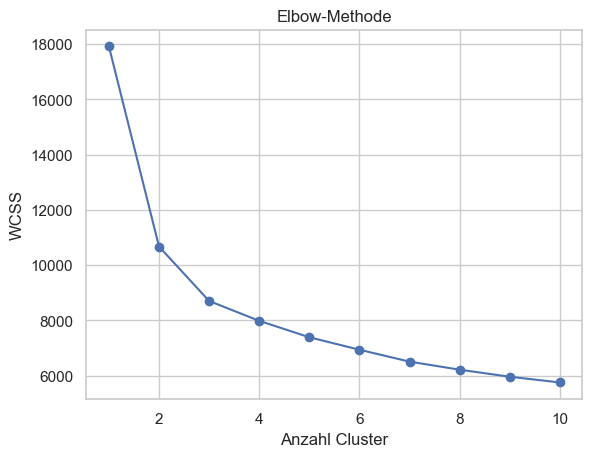

In [29]:
# Elbow-Methode: optimale Cluster-Anzahl finden
wcss = []  
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow-Methode')
plt.xlabel('Anzahl Cluster')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [30]:
# K-Means Clustering anwenden (z. B. mit 4 Clustern)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [31]:
# Cluster anzeigen: Durchschnittswerte pro Cluster
df.groupby('Cluster')[produkt_spalten + ['Gesamtausgaben']].mean().round(1)

,Ausgaben_Wein,Ausgaben_Obst,Ausgaben_Fleisch,Ausgaben_Fisch,Ausgaben_Süßigkeiten,Ausgaben_Gold,Gesamtausgaben
Cluster,,,,,,,
0,764.4,43.5,507.4,67.5,45.9,54.6,1483.2
1,44.9,4.9,23.1,6.7,5.0,14.7,99.2
2,441.1,18.6,128.0,28.0,19.3,64.1,699.1
3,487.7,96.2,393.6,130.2,97.7,97.3,1302.7


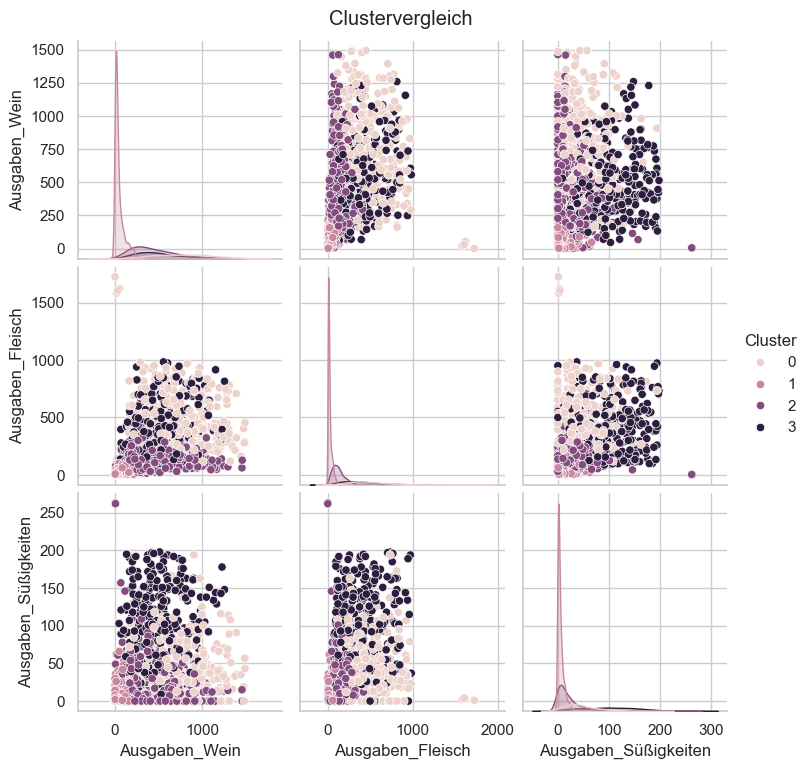

In [32]:
# Streudiagramm der Cluster nach Ausgaben
sns.pairplot(df, vars=['Ausgaben_Wein', 'Ausgaben_Fleisch', 'Ausgaben_Süßigkeiten'], hue='Cluster')
plt.suptitle('Clustervergleich', y=1.02)
plt.show()

### Interpretation der Cluster
- Cluster 0: hohe Ausgaben für Wein, mittleres Einkommen → 'Gourmets'
- Cluster 1: wenig Ausgaben, viele Onlinekäufe → 'Digitale Sparfüchse'
- Cluster 2: mittlere Ausgaben, hohe Süßigkeiten → 'Naschkatzen'
- Cluster 3: sehr hohe Gesamtausgaben → 'Premiumkunden'


In [33]:
df = pd.read_csv('Marktkampagne.csv')
df['Einkommen'].fillna(df['Einkommen'].median(), inplace=True)
df['Alter'] = pd.to_datetime('today').year - df['Geburtsjahr']

C:\Users\maxim\AppData\Local\Temp\ipykernel_17504\1812501387.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Einkommen'].fillna(df['Einkommen'].median(), inplace=True)


In [34]:
# Gesamtausgaben berechnen (alle Produktkategorien zusammenrechnen)
produkt_spalten = ['Ausgaben_Wein', 'Ausgaben_Obst', 'Ausgaben_Fleisch',
                   'Ausgaben_Fisch', 'Ausgaben_Süßigkeiten', 'Ausgaben_Gold']
df['Gesamtausgaben'] = df[produkt_spalten].sum(axis=1)
df[['Gesamtausgaben'] + produkt_spalten].head()

,Gesamtausgaben,Ausgaben_Wein,Ausgaben_Obst,Ausgaben_Fleisch,Ausgaben_Fisch,Ausgaben_Süßigkeiten,Ausgaben_Gold
0,1617,635,88,546,172,88,88
1,27,11,1,6,2,1,6
2,776,426,49,127,111,21,42
3,53,11,4,20,10,3,5
4,422,173,43,118,46,27,15


In [35]:
# Wertvolle Kunden definieren: z. B. Kunden mit Ausgaben über 1500 €
df['Wertvoll'] = df['Gesamtausgaben'] > 1500
print('Anzahl wertvoller Kunden:', df['Wertvoll'].sum())

Anzahl wertvoller Kunden: 246


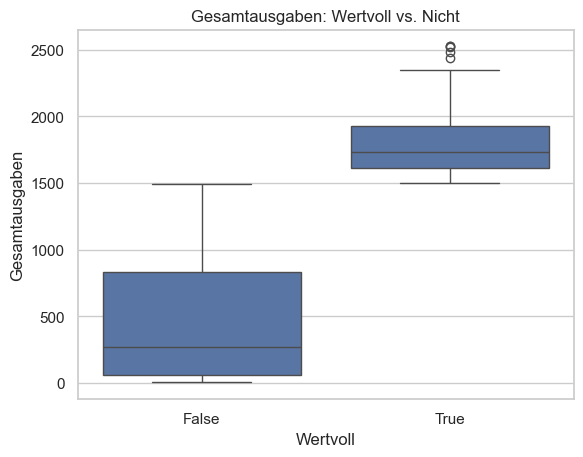

In [36]:
# Boxplot zur Veranschaulichung der Gesamtausgaben
sns.boxplot(x='Wertvoll', y='Gesamtausgaben', data=df)
plt.title('Gesamtausgaben: Wertvoll vs. Nicht')
plt.show()

In [37]:
# Durchschnittswerte wertvoller vs. nicht-wertvoller Kunden
df.groupby('Wertvoll')[['Einkommen', 'Gesamtausgaben', 'Anzahl_Webkäufe', 'Anzahl_Ladeneinkäufe']].mean().round(1)

,Einkommen,Gesamtausgaben,Anzahl_Webkäufe,Anzahl_Ladeneinkäufe
Wertvoll,,,,
False,48914.5,458.6,3.9,5.5
True,79176.9,1799.3,5.3,8.1


In [38]:
# Ausgaben pro Kind berechnen (inkl. +1 gegen Division durch 0)
df['Ausgaben_pro_Kind'] = df['Gesamtausgaben'] / (df['Kinder_zu_Hause'] + df['Teenager_zu_Hause'] + 1)
df[['Ausgaben_pro_Kind', 'Kinder_zu_Hause', 'Teenager_zu_Hause']].head()

,Ausgaben_pro_Kind,Kinder_zu_Hause,Teenager_zu_Hause
0,1617.0,0,0
1,9.0,1,1
2,776.0,0,0
3,26.5,1,0
4,211.0,1,0


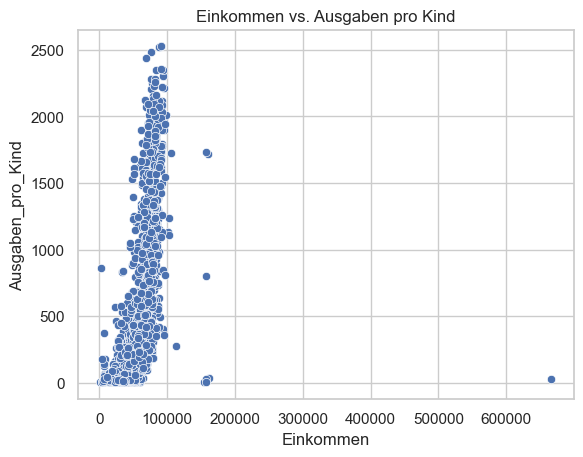

In [39]:
# Einkommen vs. Ausgaben pro Kind plotten
sns.scatterplot(x='Einkommen', y='Ausgaben_pro_Kind', data=df)
plt.title('Einkommen vs. Ausgaben pro Kind')
plt.show()

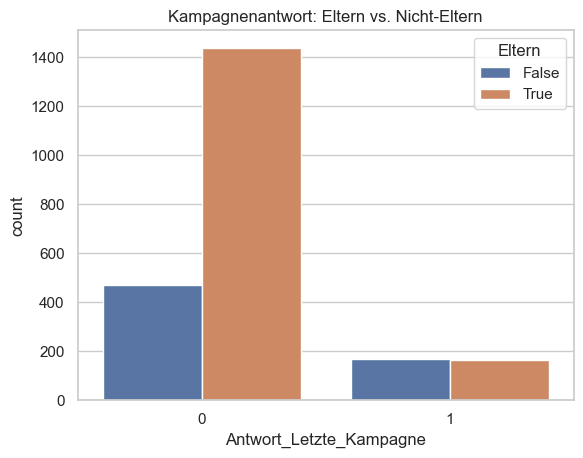

In [40]:
# Kampagnenantwort von Eltern vs. Nicht-Eltern vergleichen
df['Eltern'] = (df['Kinder_zu_Hause'] + df['Teenager_zu_Hause']) > 0
sns.countplot(x='Antwort_Letzte_Kampagne', hue='Eltern', data=df)
plt.title('Kampagnenantwort: Eltern vs. Nicht-Eltern')
plt.show()

### Fazit
- Wertvolle Kunden lassen sich gut über Gesamtausgaben identifizieren
- Eltern geben tendenziell mehr pro Kind aus
- Eltern könnten eine relevante Zielgruppe für Marketing sein
- Diese Insights unterstützen gezielte Kampagnenentscheidungen

In [41]:
df = pd.read_csv('Marktkampagne.csv')
df['Einkommen'].fillna(df['Einkommen'].median(), inplace=True)
df['Alter'] = pd.to_datetime('today').year - df['Geburtsjahr']

C:\Users\maxim\AppData\Local\Temp\ipykernel_17504\1812501387.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Einkommen'].fillna(df['Einkommen'].median(), inplace=True)


In [42]:
# Durchschnittseinkommen: Reagierer vs. Nicht-Reagierer
reaktion_ja = df[df['Antwort_Letzte_Kampagne'] == 1]['Einkommen'].mean()
reaktion_nein = df[df['Antwort_Letzte_Kampagne'] == 0]['Einkommen'].mean()
print(f'Durchschnitt Einkommen (Reagierer): {reaktion_ja:.2f} €')
print(f'Durchschnitt Einkommen (Nicht-Reagierer): {reaktion_nein:.2f} €')

Durchschnitt Einkommen (Reagierer): 60183.24 €
Durchschnitt Einkommen (Nicht-Reagierer): 50845.68 €


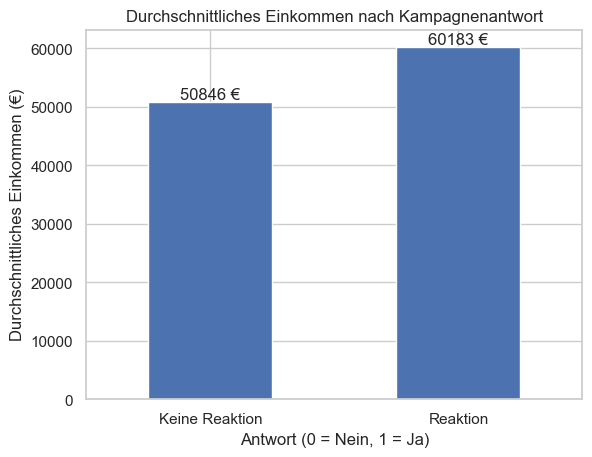

In [43]:
# Balkendiagramm: Durchschnittliches Einkommen pro Reaktionsgruppe
mittelwerte = df.groupby('Antwort_Letzte_Kampagne')['Einkommen'].mean()
ax = mittelwerte.plot(kind='bar')
plt.title('Durchschnittliches Einkommen nach Kampagnenantwort')
plt.xlabel('Antwort (0 = Nein, 1 = Ja)')
plt.ylabel('Durchschnittliches Einkommen (€)')
plt.xticks([0, 1], ['Keine Reaktion', 'Reaktion'], rotation=0)

for i, wert in enumerate(mittelwerte):
    plt.text(i, wert + 500, f"{wert:.0f} €", ha='center')

plt.show()


In [44]:
# Logistische Regression: Einkommen & Alter → Kampagnenantwort
X = df[['Einkommen', 'Alter']]
y = df['Antwort_Letzte_Kampagne']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
modell = LogisticRegression(max_iter=1000)
modell.fit(X_train, y_train)
y_pred = modell.predict(X_test)

In [45]:
# Bewertung des Modells
print('Genauigkeit:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Genauigkeit: 0.8571428571428571
Confusion Matrix:
[[576   1]
 [ 95   0]]


### Fazit
- Das durchschnittliche Einkommen unterscheidet sich leicht zwischen Reagierern und Nicht-Reagierern
- Das Modell auf Basis von Einkommen & Alter liefert eine erste, einfache Einschätzung
- Dies unterstützt gezieltes Marketing an kaufkräftige Gruppen

In [46]:
df = pd.read_csv("Marktkampagne.csv")
df['Einkommen'].fillna(df['Einkommen'].median(), inplace=True)
df['Alter'] = 2025 - df['Geburtsjahr']
ausgaben_spalten = ['Ausgaben_Wein', 'Ausgaben_Obst', 'Ausgaben_Fleisch', 
                    'Ausgaben_Fisch', 'Ausgaben_Süßigkeiten', 'Ausgaben_Gold']
df['Gesamtausgaben'] = df[ausgaben_spalten].sum(axis=1)
df['Altersgruppe'] = pd.cut(df['Alter'], bins=[18, 30, 50, 70, 100], labels=['18-30', '31-50', '51-70', '70+'], right=False)


C:\Users\maxim\AppData\Local\Temp\ipykernel_17504\1228682519.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Einkommen'].fillna(df['Einkommen'].median(), inplace=True)


### Geschlecht & Gesamtausgaben

### Altersgruppen & Ausgaben

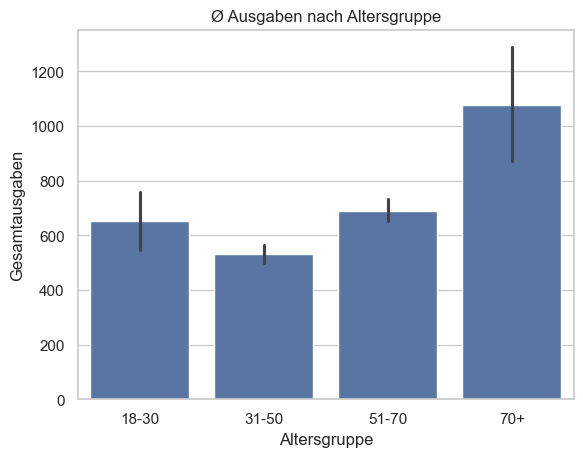

In [47]:

sns.barplot(x='Altersgruppe', y='Gesamtausgaben', data=df)
plt.title('Ø Ausgaben nach Altersgruppe')
plt.show()


### Antwort auf letzte Kampagne

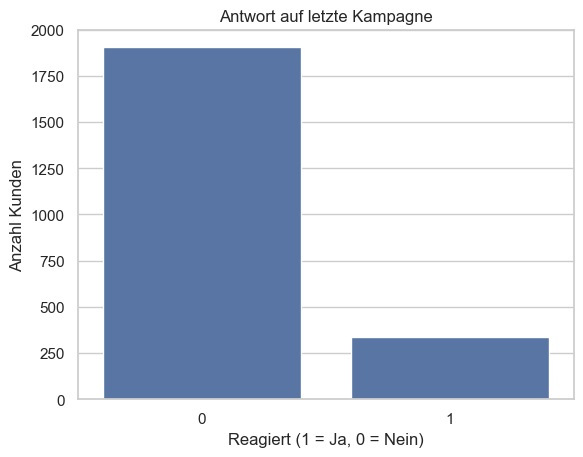

In [48]:

sns.countplot(x='Antwort_Letzte_Kampagne', data=df)
plt.title('Antwort auf letzte Kampagne')
plt.xlabel('Reagiert (1 = Ja, 0 = Nein)')
plt.ylabel('Anzahl Kunden')
plt.show()


### Ø Ausgaben nach Familienstand

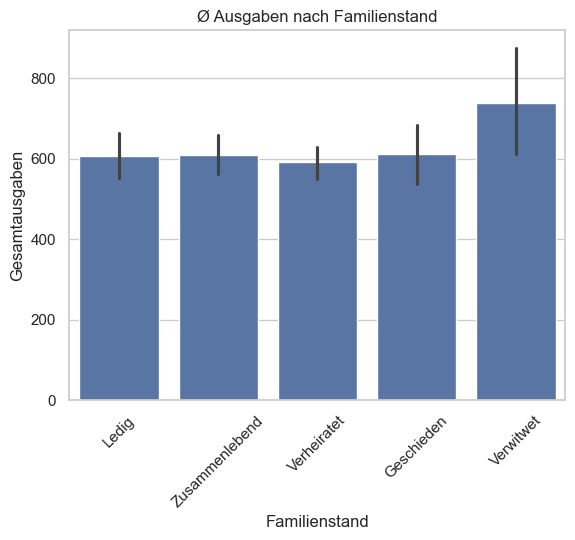

In [60]:
# Zeilen mit bestimmten Familienstand-Einträgen entfernen
df_filt = df[~df['Familienstand'].isin(['Absurd', 'Man lebt nur einmal', 'Allein'])]

sns.barplot(x='Familienstand', y='Gesamtausgaben', data=df_filt)
plt.title('Ø Ausgaben nach Familienstand')
plt.xticks(rotation=45)
plt.show()


### Käufe nach Kanal

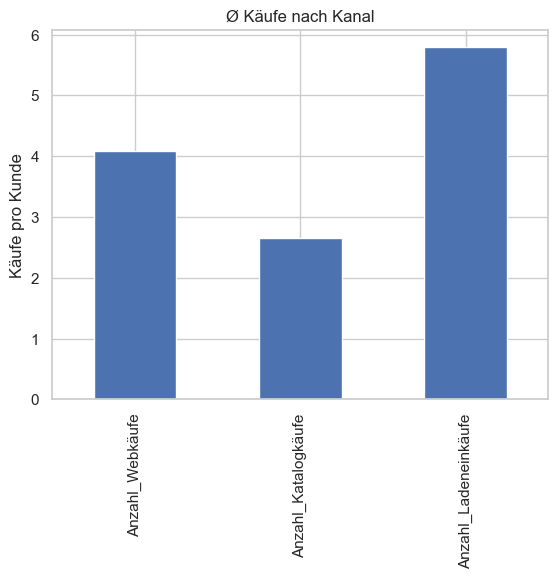

In [50]:

kanal_spalten = ['Anzahl_Webkäufe', 'Anzahl_Katalogkäufe', 'Anzahl_Ladeneinkäufe']
df[kanal_spalten].mean().plot(kind='bar')
plt.title('Ø Käufe nach Kanal')
plt.ylabel('Käufe pro Kunde')
plt.show()


### Kinderanzahl vs. Ausgaben

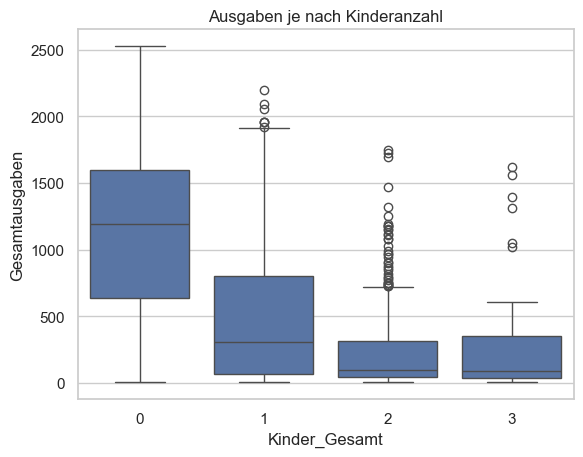

In [51]:

df['Kinder_Gesamt'] = df['Kinder_zu_Hause'] + df['Teenager_zu_Hause']
sns.boxplot(x='Kinder_Gesamt', y='Gesamtausgaben', data=df)
plt.title('Ausgaben je nach Kinderanzahl')
plt.show()


### Beschwerden vs. Gesamtausgaben

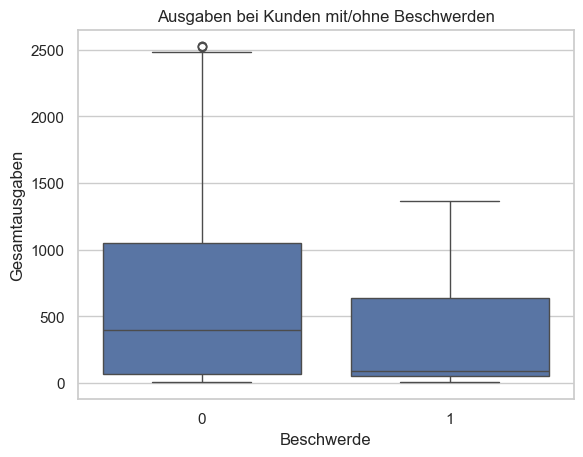

In [52]:

sns.boxplot(x='Beschwerde', y='Gesamtausgaben', data=df)
plt.title('Ausgaben bei Kunden mit/ohne Beschwerden')
plt.show()


### Letzter Kauf vs. Ausgaben

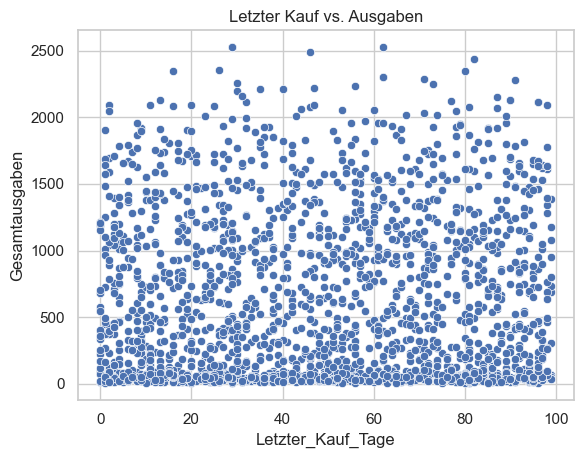

In [53]:

sns.scatterplot(x='Letzter_Kauf_Tage', y='Gesamtausgaben', data=df)
plt.title('Letzter Kauf vs. Ausgaben')
plt.show()


### Rabattnutzung nach Anzahl Rabatte

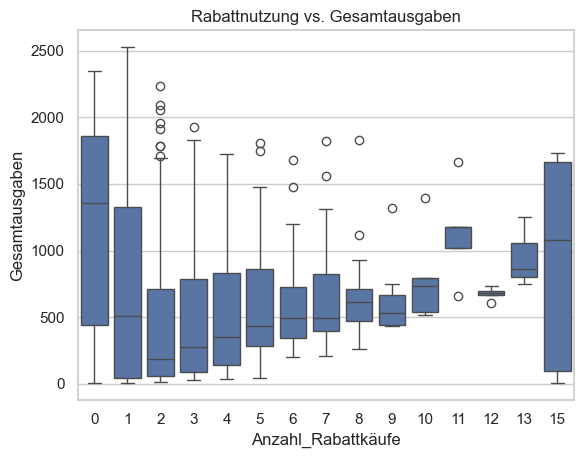

In [54]:

sns.boxplot(x='Anzahl_Rabattkäufe', y='Gesamtausgaben', data=df)
plt.title('Rabattnutzung vs. Gesamtausgaben')
plt.show()


### Ausgaben nach Kategorie

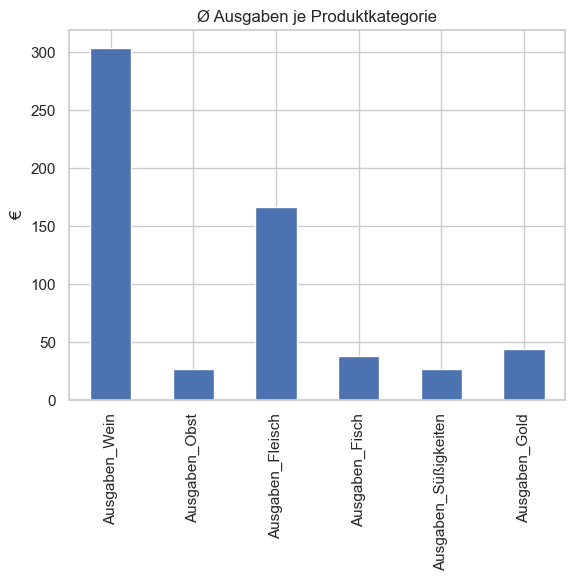

In [55]:

ausgaben_spalten = ['Ausgaben_Wein', 'Ausgaben_Obst', 'Ausgaben_Fleisch', 
                    'Ausgaben_Fisch', 'Ausgaben_Süßigkeiten', 'Ausgaben_Gold']
df[ausgaben_spalten].mean().plot(kind='bar')
plt.title('Ø Ausgaben je Produktkategorie')
plt.ylabel('€')
plt.show()


### Einkommensverteilung

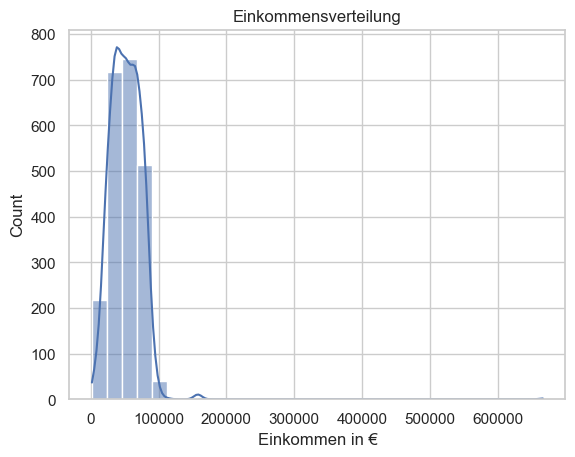

In [56]:

sns.histplot(df['Einkommen'], bins=30, kde=True)
plt.title('Einkommensverteilung')
plt.xlabel('Einkommen in €')
plt.show()
